### ATC unit airspace (AUA)

- `ECTL_ID`: As in Flights file
- `Sequence Number`: Numeric sequence number of the airspace entered by the flight in chronological order
- `AUA ID`: The identifier of the AUA
- `Entry Time`: Time (UTC) the flight entered the airspace
- `Exit Time`: Time (UTC) the flight exited the airspace

In [3]:
import pandas as pd
aua_file_path = './Eurocontrol_data/202112/Flight_AUAs_Actual_20211201_20211231.csv'
aua_df = pd.read_csv(aua_file_path)
print(f'Unique flight id: {aua_df["ECTRL ID"].nunique()}') # slightly less thant flights in flight file (570200)
print(f'shape: {aua_df.shape}')
print(f'Unique AUA ID: {aua_df["AUA ID"].nunique()}')
aua_df.head(10)


Unique flight id: 570194
shape: (3907314, 5)
Unique AUA ID: 537


,ECTRL ID,Sequence Number,AUA ID,Entry Time,Exit Time
0,248113105,1,KKKKCTA,01-12-2021 00:37:00,01-12-2021 01:10:32
1,248113105,2,ATC_UNK,01-12-2021 01:10:32,01-12-2021 05:21:58
2,248113105,3,EGGXOCA,01-12-2021 05:21:58,01-12-2021 06:15:30
3,248113105,4,EISNCTA,01-12-2021 06:15:30,01-12-2021 06:59:56
4,248113105,5,EGTTCTA,01-12-2021 06:59:56,01-12-2021 07:20:50
5,248113105,6,EGTTTCTA,01-12-2021 07:20:50,01-12-2021 07:42:21
6,248113105,7,EGTTICTA,01-12-2021 07:42:21,01-12-2021 07:45:12
7,248113106,1,OLBBCTA,01-12-2021 00:43:00,01-12-2021 00:54:37
8,248113106,2,LCCCCTA,01-12-2021 00:54:37,01-12-2021 01:10:06
9,248113106,3,LTAASCTA,01-12-2021 01:10:06,01-12-2021 01:49:13


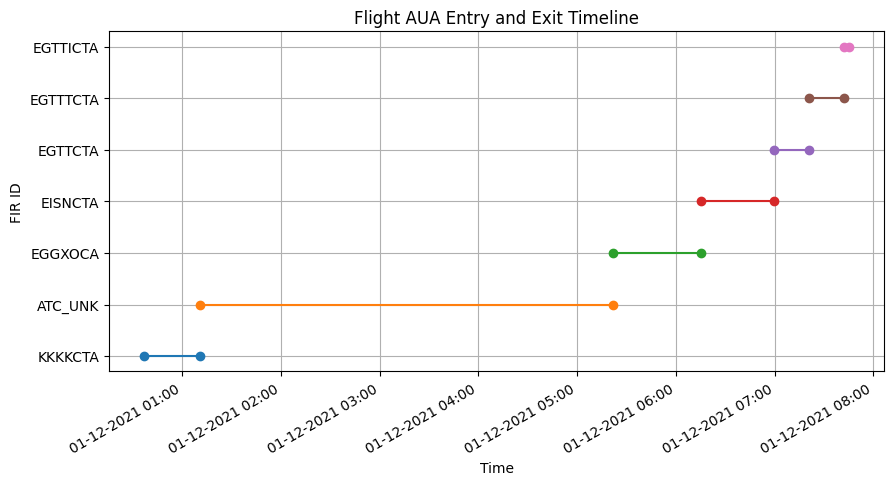

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


flight_id =  aua_df['ECTRL ID'].unique()[0]
sample_flight = aua_df[aua_df['ECTRL ID'] == flight_id]


sample_flight.loc[:, 'Entry Time'] = pd.to_datetime(sample_flight['Entry Time'], format='%d-%m-%Y %H:%M:%S')
sample_flight.loc[:, 'Exit Time'] = pd.to_datetime(sample_flight['Exit Time'], format='%d-%m-%Y %H:%M:%S')

# Plot the FIR entry and exit timeline
plt.figure(figsize=(10, 5))
for _, row in sample_flight.iterrows():
    plt.plot([row['Entry Time'], row['Exit Time']], [row['AUA ID'], row['AUA ID']], marker = 'o')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.title('Flight AUA Entry and Exit Timeline')
plt.xlabel('Time')
plt.ylabel('FIR ID')
plt.grid(True)
plt.show()
